In [3]:
import requests
import networkx as nx
import dhlab.graph_networkx_louvain as gnl

In [4]:
url = "https://api.nb.no/dhlab/nb_ngram_galaxies/galaxies/query"

colors =  ['#DC143C','#FFA500',
           '#F0E68C','#BC8F8F','#32CD32',
           '#D2691E','#3CB371','#00CED1',
           '#00BFFF','#8B008B','#FFC0CB',
           '#FF00FF','#FAEBD7']

In [5]:
def draw_graph_centrality2(G, Subsets=[],  h=15, v=10, deltax=0, deltay=0, fontsize=18, k=0.2, arrows=False, 
                           node_alpha=0.3, l_alpha=1, node_color='blue', centrality=nx.degree_centrality, 
                           font_color='black', 
                           threshold=0.01, 
                           multi=3000,
                          edge_color='olive',
                           edge_alpha = 0.1,
                          colstart=0.2,
                          coldark=0.5,
                          show_borders = None):
    
    from pylab import rcParams
    import matplotlib.pyplot as plt
    from matplotlib import colors as mcolors


    colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    node_dict = centrality(G)
    subnodes = dict({x:node_dict[x] for x in node_dict if node_dict[x] >= threshold})
    #print(subnodes)
    x, y = rcParams['figure.figsize']
    rcParams['figure.figsize'] = h, v
    
    ax = plt.subplot()
    ax.set_xticks([])
    ax.set_yticks([])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    for spine in show_borders:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color("grey")
    #G = G.subgraph(subnodes)
    glob_col = sns.hls_palette(len(G), h=colstart, l=coldark)[0]
    pos = nx.spring_layout(G, k=k)
    labelpos = dict({k:(pos[k][0]+ deltax, pos[k][1] + deltay) for k in pos })
    #print(labelpos)
    #print(pos)
    if l_alpha <= 1:
        nx.draw_networkx_labels(G, labelpos, font_size=fontsize, alpha = l_alpha, font_color = font_color)
    sub_color = 0
    if Subsets != []:
        i = 0
        colpalette = sns.hls_palette(len(Subsets), h=colstart, l=coldark)
        #print(colpalette)
        for Sub in Subsets:
            sublist = dict({x:subnodes[x] for x in subnodes if x in Sub})
            #print(sublist)
            #sub_col = list(colors.values())[np.random.randint(20,100)]
            sub_col= colpalette[i]
            #print(i, sub_col, sublist.keys())
            #print(i, sub_col)
            nx.draw_networkx_nodes(G, pos, alpha=node_alpha, node_color = [sub_col], nodelist= [x for x in sublist.keys()], node_size = [v * multi for v in sublist.values()])
            i += 1
    else:
        nx.draw_networkx_nodes(G, pos, alpha=node_alpha, node_color= glob_col,  nodelist = subnodes.keys(), node_size = [v * multi for v in subnodes.values()])
        True
        
    nx.draw_networkx_edges(G, pos, alpha= edge_alpha, arrows = arrows, edge_color = edge_color)

    rcParams['figure.figsize'] = x, y
    return

In [6]:
def word_graph(word = None, cutoff = 20, corpus = 'all'):
    """ corpus = bok, avis or all"""
    params = {
        'terms':word, 
        'leaves':0,
        'limit':cutoff,
        'corpus':corpus,
    }
    r = requests.get(url, params = params)
    G = nx.DiGraph()
    edgelist = []
    if r.status_code == 200:
        #graph = json.loads(result.text)
        graph = r.json()
        #print(graph)
        nodes = graph['nodes']
        edges = graph['links']
        for edge in edges:
            source, target = (nodes[edge['source']]['name'], nodes[edge['target']]['name'])
            if source.isalnum() and target.isalnum():
                edgelist += [(source, target, abs(edge['value']))]
        G.add_weighted_edges_from(edgelist)
    return G

In [8]:
Gs = [nx.subgraph(word_graph(w).to_undirected(), words) for w in words]


KeyboardInterrupt



In [ ]:
G = nx.Graph()  # Start with an empty graph

for Gi in Gs:
    G = nx.compose(G, Gi)


In [9]:
import networkx as nx
import community
import json

#G = nx.Graph()
# ... add nodes and edges ...

In [14]:
# Compute the best partition (community assignment)
klynger = {'energi-vital': "energi, Energi, vitalitet, Vitalitet, livsglede, livskraft, virkelyst",
'energi-miljø': "energi, klima, fossekraft, energikilder",
'energi-økonomi': "energi, konsesjonslov, grunnrente, miljø, arbeidslyst"}

for kind in klynger:
    G = word_graph(klynger[kind], cutoff = 40)
    partition = community.best_partition(G.to_undirected())
    centrality = nx.degree_centrality(G.to_undirected())
    
    
    
    data = {
        "nodes": [{"id": node, "centrality": centrality[node],  "community": partition[node]} for node in G.nodes()],
        "links": [{"source": u, "target": v} for u, v in G.edges()]
    }
    
    with open(f'./d3_force_layout/{kind}-network.json', 'w') as f:
        json.dump(data, f)

In [100]:
gnl.show_communities(G)

Energi-Kraft :  Energi, Kraft, Dygtighed, Mod, Krast, Livskraft, Foretagsomhed, Udholdenhed, Sundhed, Styrke, Dygtighet, Intelligens, Aand, Begeistring, BKK, Arbeidsevne, sundhed, Livsmod, Fylde, Varme, Industri, Konstitution, Omsigt, Safe, en, Viljekraft, Iver, Flid, Klima, Enøk, Inneklima, Indsigt, Saft, Glitre, Olje, derved, Fjordkraft, Interesse, Arbeidslyst, Lys, Dristighed, Fasthed, Tiltag, Magt, Haab, Levedygtighed, den, i, Klogskab, Inderlighed, Klarhed, Begavelse, Glæde, Bestemthed, Visdom, Omtanke, Tapperhed, Kraftforsyning, Velsmag, AS, Smidighed, styrke, Vannkraft, Skønhed, Vand, Hurtighed, Lethed, NVE, hed, Naade, Ventilasjon, Kundskaber, Beslutsomhed, Hæderlighed, Ihærdighed, Alvor, stjerners, Statkraft, Tindra, Kundskab, Tro, Finhed, Sygdom, Evner, Selvopofrelse, Lederne, Kulde, Tomat, Beundring, SKL, Grundlov, Syltetsi, Landbrug, Konge, Dødsforagt, Pligttroskab, sygdom, Virkning, Troskap, Jubel, Soliditet, Seighed, Retning, Gloede, Omhu, dels, Ord, Hilse, Haandværk, BIR

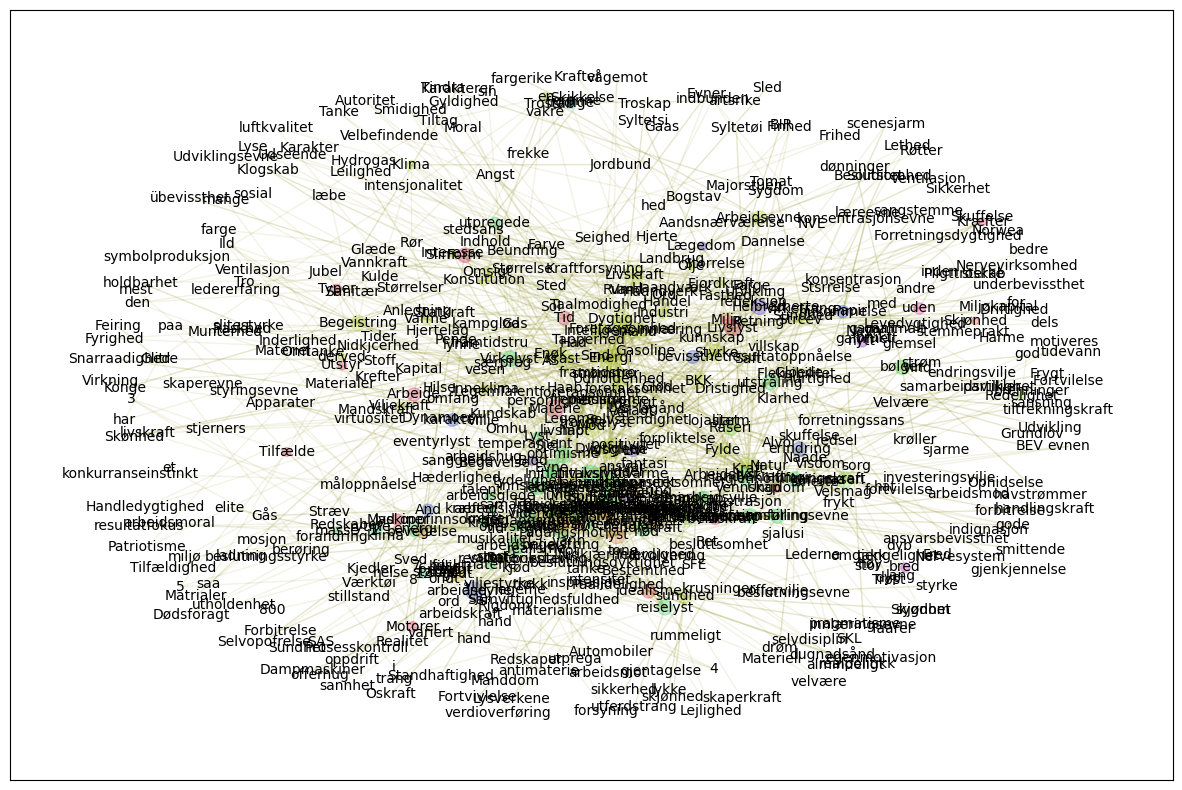

In [101]:
gnl.show_graph(G, spread=1)

In [8]:
import json

g=G
nodes = [{'name': str(i)}
         for i in g.nodes()]
links = [{'source': u[0], 'target': u[1]}
         for u in g.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links},
              f, indent=4,)


import json
import networkx as nx
from IPython.display import display, Javascript

# Convert to JSON-compatible data
nodes = [{'name': n, 'index': i} for i, n in enumerate(G.nodes)]
edges = [{'source': list(G.nodes).index(e[0]), 'target': list(G.nodes).index(e[1])} for e in G.edges]

graph_data = json.dumps({'nodes': nodes, 'links': edges})


# Pass the JSON string to JavaScript
display(Javascript(f'window.graphData={graph_data};'))



In [13]:
html_widget = HTML(
    f"""
    <p>hello <em>there</em></p>
    """
)

display(html_widget)

HTML(value='\n    <p>hello <em>there</em></p>\n    ')

In [19]:
import json
import networkx as nx
from ipywidgets import HTML
from IPython.display import display

G = word_graph("demokrati")

# Convert to JSON-compatible data
nodes = [{'name': str(n), 'index': i} for i, n in enumerate(G.nodes)]
edges = [{'source': list(G.nodes).index(e[0]), 'target': list(G.nodes).index(e[1])} for e in G.edges]
graph_data = json.dumps({'nodes': nodes, 'links': edges})


In [87]:
#graph_data

In [88]:
display(HTML('<script src="https://d3js.org/d3.v6.min.js"></script>'))


In [89]:
from IPython.display import display, HTML, Javascript

js_code = '''
var script = document.createElement('script');
script.type = 'text/javascript';
script.src = 'https://d3js.org/d3.v6.min.js';
document.head.appendChild(script);

script.onload = function() {
    var svg = d3.select("#mysvg");
    svg.append("circle")
        .attr("cx", 50)
        .attr("cy", 50)
        .attr("r", 10)
        .attr("fill", "blue");
}
'''

# Display SVG canvas first
html_widget = HTML('<svg width="800" height="600" id="mysvg"></svg>')
display(html_widget)

# Execute JavaScript
display(Javascript(js_code))


<IPython.core.display.Javascript object>

In [90]:
from pyvis.network import Network
import networkx as nx

# Create a simple Graph
G = word_graph("demokrati")

net = Network(notebook=True)
net.from_nx(G)

for edge in net.edges:
    edge.update({'color': 'rgba(0,255,0,0.5)', 'width':0.8})  # Last value is alpha

# Show the network
net.show("example.html")


example.html


In [92]:
display(HTML("""
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Network Graph</title>
  <script src="https://d3js.org/d3.v6.min.js"></script>
</head>
<body>
  
  <svg width="800" height="600" id="mysvg"></svg>
  
  <script>
    var graphData = 
      {"nodes": [{"name": "demokrati", "index": 0}, {"name": "likeverd", "index": 1}, {"name": "menneskerettigheter", "index": 2}, {"name": "diktatur", "index": 3}, {"name": "folkestyre", "index": 4}, {"name": "markeds\\u00f8konomi", "index": 5}, {"name": "rettsstat", "index": 6}, {"name": "parlamentarisme", "index": 7}, {"name": "medborgerskap", "index": 8}, {"name": "frihet", "index": 9}, {"name": "sosialisme", "index": 10}, {"name": "ytringsfrihet", "index": 11}, {"name": "menneskerettar", "index": 12}, {"name": "korporativ", "index": 13}, {"name": "likestilling", "index": 14}, {"name": "rettssikkerhet", "index": 15}, {"name": "menneskeretter", "index": 16}, {"name": "flerpartisystem", "index": 17}, {"name": "ytringsfridom", "index": 18}, {"name": "medbestemmelse", "index": 19}, {"name": "totalitarisme", "index": 20}, {"name": "solidaritet", "index": 21}, {"name": "likerett", "index": 22}, {"name": "gjensidighet", "index": 23}, {"name": "respekt", "index": 24}, {"name": "rettferdighet", "index": 25}, {"name": "toleranse", "index": 26}, {"name": "jamstilling", "index": 27}, {"name": "menneskeverd", "index": 28}, {"name": "likebehandling", "index": 29}, {"name": "mangfold", "index": 30}, {"name": "likhet", "index": 31}, {"name": "grunnleggende", "index": 32}, {"name": "demokratiutvikling", "index": 33}, {"name": "rettsstatsprinsipper", "index": 34}, {"name": "folkerett", "index": 35}, {"name": "religionsfrihet", "index": 36}, {"name": "klassevelde", "index": 37}, {"name": "ensretting", "index": 38}, {"name": "politistat", "index": 39}, {"name": "undertrykkelse", "index": 40}, {"name": "terror", "index": 41}, {"name": "tyranni", "index": 42}, {"name": "tvangsstat", "index": 43}, {"name": "forfatning", "index": 44}, {"name": "folkefrihet", "index": 45}, {"name": "flertalsstyre", "index": 46}, {"name": "lokaldemokrati", "index": 47}, {"name": "sj\\u00f8lvr\\u00e5derett", "index": 48}, {"name": "rettssamfund", "index": 49}, {"name": "grunnlov", "index": 50}, {"name": "klassestyre", "index": 51}, {"name": "plan\\u00f8konomi", "index": 52}, {"name": "frihandel", "index": 53}, {"name": "kommando\\u00f8konomi", "index": 54}, {"name": "kapitalisme", "index": 55}, {"name": "privatisering", "index": 56}, {"name": "liberalisme", "index": 57}, {"name": "kulturnasjon", "index": 58}, {"name": "velferdsstat", "index": 59}, {"name": "humanisme", "index": 60}, {"name": "maktfordeling", "index": 61}, {"name": "et", "index": 62}, {"name": "presidentstyre", "index": 63}, {"name": "byregjering", "index": 64}, {"name": "partivesen", "index": 65}, {"name": "regjeringsmakt", "index": 66}, {"name": "demokratisk", "index": 67}, {"name": "demokratiske", "index": 68}, {"name": "deltakelse", "index": 69}, {"name": "utvikling", "index": 70}, {"name": "selvstendighet", "index": 71}, {"name": "uavhengighet", "index": 72}, {"name": "sj\\u00f8lstende", "index": 73}, {"name": "fred", "index": 74}, {"name": "selvbestemmelse", "index": 75}, {"name": "ansvar", "index": 76}, {"name": "kommunisme", "index": 77}, {"name": "konservatisme", "index": 78}, {"name": "sosialdemokrati", "index": 79}, {"name": "anarkisme", "index": 80}, {"name": "marxisme", "index": 81}, {"name": "statskapitalisme", "index": 82}, {"name": "kristendom", "index": 83}, {"name": "pressefrihet", "index": 84}, {"name": "organisasjonsfrihet", "index": 85}, {"name": "lojalitetsplikt", "index": 86}, {"name": "trosfrihet", "index": 87}, {"name": "personvern", "index": 88}, {"name": "forsamlingsfrihet", "index": 89}, {"name": "trykkefrihet", "index": 90}, {"name": "blasfemi", "index": 91}, {"name": "nedrusting", "index": 92}, {"name": "religionsfridom", "index": 93}, {"name": "rettstryggleik", "index": 94}, {"name": "fridom", "index": 95}, {"name": "folkeretten", "index": 96}, {"name": "likel\\u00f8nn", "index": 97}, {"name": "kvinnefrigj\\u00f8ring", "index": 98}, {"name": "kvinnesak", "index": 99}, {"name": "feminisme", "index": 100}, {"name": "frigj\\u00f8ring", "index": 101}, {"name": "kvinnekamp", "index": 102}, {"name": "integrering", "index": 103}, {"name": "forutberegnelighet", "index": 104}, {"name": "andre", "index": 105}, {"name": "valg", "index": 106}, {"name": "trusfridom", "index": 107}, {"name": "pressefridom", "index": 108}, {"name": "\\u00e5ndsfridom", "index": 109}, {"name": "medinnflytelse", "index": 110}, {"name": "medansvar", "index": 111}, {"name": "eiendomsrett", "index": 112}, {"name": "bedriftsdemokrati", "index": 113}, {"name": "innflytelse", "index": 114}, {"name": "medvirkning", "index": 115}, {"name": "n\\u00e6rdemokrati", "index": 116}, {"name": "Diktatur", "index": 117}, {"name": "Demokrati", "index": 118}, {"name": "revolusjon", "index": 119}, {"name": "borgerkrig", "index": 120}, {"name": "ufrihet", "index": 121}, {"name": "vold", "index": 122}, {"name": "kultur", "index": 123}, {"name": "Aksjoner", "index": 124}, {"name": "Deliberasjon", "index": 125}, {"name": "Empirisme", "index": 126}, {"name": "Makt", "index": 127}, {"name": "byr\\u00e5krati", "index": 128}, {"name": "Hemmelighold", "index": 129}, {"name": "Rasehat", "index": 130}, {"name": "Sosialisme", "index": 131}, {"name": "kvinnefrigjering", "index": 132}, {"name": "litteratur", "index": 133}, {"name": "Kristendom", "index": 134}, {"name": "pluralisme", "index": 135}, {"name": "Sivilprosess", "index": 136}, {"name": "folkesuverenitet", "index": 137}, {"name": "journalistikk", "index": 138}, {"name": "rettigheter", "index": 139}, {"name": "Fred", "index": 140}, {"name": "trygghet", "index": 141}, {"name": "Menneskeverd", "index": 142}, {"name": "Grunnlov", "index": 143}], "links": [{"source": 0, "target": 1}, {"source": 0, "target": 2}, {"source": 0, "target": 3}, {"source": 0, "target": 4}, {"source": 0, "target": 5}, {"source": 0, "target": 6}, {"source": 0, "target": 7}, {"source": 0, "target": 8}, {"source": 0, "target": 9}, {"source": 0, "target": 10}, {"source": 0, "target": 11}, {"source": 0, "target": 12}, {"source": 0, "target": 13}, {"source": 0, "target": 14}, {"source": 0, "target": 15}, {"source": 0, "target": 16}, {"source": 0, "target": 17}, {"source": 0, "target": 18}, {"source": 0, "target": 19}, {"source": 0, "target": 20}, {"source": 1, "target": 8}, {"source": 1, "target": 14}, {"source": 1, "target": 21}, {"source": 1, "target": 22}, {"source": 1, "target": 23}, {"source": 1, "target": 24}, {"source": 1, "target": 25}, {"source": 1, "target": 26}, {"source": 1, "target": 27}, {"source": 1, "target": 28}, {"source": 1, "target": 29}, {"source": 1, "target": 30}, {"source": 1, "target": 31}, {"source": 2, "target": 0}, {"source": 2, "target": 5}, {"source": 2, "target": 11}, {"source": 2, "target": 6}, {"source": 2, "target": 32}, {"source": 2, "target": 33}, {"source": 2, "target": 34}, {"source": 2, "target": 28}, {"source": 2, "target": 35}, {"source": 2, "target": 36}, {"source": 2, "target": 14}, {"source": 3, "target": 0}, {"source": 3, "target": 20}, {"source": 3, "target": 37}, {"source": 3, "target": 38}, {"source": 3, "target": 39}, {"source": 3, "target": 40}, {"source": 3, "target": 41}, {"source": 3, "target": 42}, {"source": 3, "target": 43}, {"source": 4, "target": 0}, {"source": 4, "target": 44}, {"source": 4, "target": 45}, {"source": 4, "target": 7}, {"source": 4, "target": 46}, {"source": 4, "target": 47}, {"source": 4, "target": 48}, {"source": 4, "target": 49}, {"source": 4, "target": 3}, {"source": 4, "target": 50}, {"source": 4, "target": 51}, {"source": 4, "target": 6}, {"source": 5, "target": 52}, {"source": 5, "target": 53}, {"source": 5, "target": 0}, {"source": 5, "target": 54}, {"source": 5, "target": 55}, {"source": 5, "target": 56}, {"source": 5, "target": 57}, {"source": 5, "target": 17}, {"source": 5, "target": 6}, {"source": 6, "target": 0}, {"source": 6, "target": 58}, {"source": 6, "target": 2}, {"source": 6, "target": 12}, {"source": 6, "target": 59}, {"source": 6, "target": 15}, {"source": 6, "target": 60}, {"source": 6, "target": 39}, {"source": 6, "target": 4}, {"source": 6, "target": 5}, {"source": 6, "target": 61}, {"source": 6, "target": 62}, {"source": 6, "target": 11}, {"source": 6, "target": 26}, {"source": 6, "target": 14}, {"source": 7, "target": 0}, {"source": 7, "target": 5}, {"source": 7, "target": 17}, {"source": 7, "target": 4}, {"source": 7, "target": 63}, {"source": 7, "target": 64}, {"source": 7, "target": 65}, {"source": 7, "target": 46}, {"source": 7, "target": 66}, {"source": 7, "target": 61}, {"source": 7, "target": 57}, {"source": 8, "target": 67}, {"source": 8, "target": 0}, {"source": 8, "target": 68}, {"source": 8, "target": 2}, {"source": 8, "target": 69}, {"source": 8, "target": 70}, {"source": 9, "target": 0}, {"source": 9, "target": 16}, {"source": 9, "target": 20}, {"source": 9, "target": 4}, {"source": 9, "target": 71}, {"source": 9, "target": 72}, {"source": 9, "target": 31}, {"source": 9, "target": 25}, {"source": 9, "target": 73}, {"source": 9, "target": 74}, {"source": 9, "target": 75}, {"source": 9, "target": 28}, {"source": 9, "target": 76}, {"source": 9, "target": 6}, {"source": 10, "target": 0}, {"source": 10, "target": 77}, {"source": 10, "target": 55}, {"source": 10, "target": 57}, {"source": 10, "target": 78}, {"source": 10, "target": 79}, {"source": 10, "target": 52}, {"source": 10, "target": 80}, {"source": 10, "target": 81}, {"source": 10, "target": 82}, {"source": 10, "target": 43}, {"source": 10, "target": 83}, {"source": 11, "target": 0}, {"source": 11, "target": 16}, {"source": 11, "target": 84}, {"source": 11, "target": 85}, {"source": 11, "target": 36}, {"source": 11, "target": 86}, {"source": 11, "target": 87}, {"source": 11, "target": 88}, {"source": 11, "target": 89}, {"source": 11, "target": 2}, {"source": 11, "target": 15}, {"source": 11, "target": 90}, {"source": 11, "target": 91}, {"source": 11, "target": 6}, {"source": 12, "target": 0}, {"source": 12, "target": 18}, {"source": 12, "target": 92}, {"source": 12, "target": 93}, {"source": 12, "target": 94}, {"source": 12, "target": 28}, {"source": 12, "target": 1}, {"source": 12, "target": 95}, {"source": 12, "target": 96}, {"source": 12, "target": 68}, {"source": 12, "target": 35}, {"source": 12, "target": 60}, {"source": 14, "target": 1}, {"source": 14, "target": 97}, {"source": 14, "target": 98}, {"source": 14, "target": 99}, {"source": 14, "target": 100}, {"source": 14, "target": 101}, {"source": 14, "target": 30}, {"source": 14, "target": 102}, {"source": 14, "target": 103}, {"source": 15, "target": 29}, {"source": 15, "target": 88}, {"source": 15, "target": 104}, {"source": 15, "target": 11}, {"source": 15, "target": 2}, {"source": 15, "target": 31}, {"source": 16, "target": 0}, {"source": 16, "target": 11}, {"source": 16, "target": 6}, {"source": 16, "target": 96}, {"source": 16, "target": 36}, {"source": 16, "target": 28}, {"source": 16, "target": 67}, {"source": 16, "target": 1}, {"source": 16, "target": 9}, {"source": 16, "target": 32}, {"source": 16, "target": 74}, {"source": 16, "target": 105}, {"source": 16, "target": 62}, {"source": 17, "target": 5}, {"source": 17, "target": 7}, {"source": 17, "target": 0}, {"source": 17, "target": 84}, {"source": 17, "target": 106}, {"source": 17, "target": 62}, {"source": 17, "target": 105}, {"source": 18, "target": 93}, {"source": 18, "target": 86}, {"source": 18, "target": 107}, {"source": 18, "target": 94}, {"source": 18, "target": 108}, {"source": 18, "target": 12}, {"source": 18, "target": 109}, {"source": 18, "target": 0}, {"source": 18, "target": 91}, {"source": 18, "target": 88}, {"source": 18, "target": 26}, {"source": 18, "target": 28}, {"source": 19, "target": 110}, {"source": 19, "target": 111}, {"source": 19, "target": 112}, {"source": 19, "target": 113}, {"source": 19, "target": 114}, {"source": 19, "target": 75}, {"source": 19, "target": 115}, {"source": 19, "target": 0}, {"source": 19, "target": 76}, {"source": 19, "target": 116}, {"source": 20, "target": 0}, {"source": 21, "target": 1}, {"source": 22, "target": 1}, {"source": 23, "target": 1}, {"source": 24, "target": 1}, {"source": 25, "target": 9}, {"source": 25, "target": 1}, {"source": 26, "target": 1}, {"source": 27, "target": 1}, {"source": 28, "target": 16}, {"source": 28, "target": 1}, {"source": 28, "target": 12}, {"source": 28, "target": 2}, {"source": 29, "target": 15}, {"source": 30, "target": 14}, {"source": 30, "target": 1}, {"source": 31, "target": 9}, {"source": 31, "target": 1}, {"source": 33, "target": 2}, {"source": 34, "target": 2}, {"source": 35, "target": 16}, {"source": 35, "target": 12}, {"source": 35, "target": 2}, {"source": 36, "target": 16}, {"source": 36, "target": 11}, {"source": 37, "target": 3}, {"source": 38, "target": 3}, {"source": 39, "target": 3}, {"source": 41, "target": 3}, {"source": 44, "target": 17}, {"source": 45, "target": 4}, {"source": 46, "target": 7}, {"source": 47, "target": 4}, {"source": 48, "target": 4}, {"source": 50, "target": 4}, {"source": 51, "target": 3}, {"source": 52, "target": 5}, {"source": 52, "target": 10}, {"source": 53, "target": 5}, {"source": 54, "target": 5}, {"source": 55, "target": 5}, {"source": 55, "target": 10}, {"source": 55, "target": 6}, {"source": 56, "target": 5}, {"source": 57, "target": 5}, {"source": 57, "target": 10}, {"source": 57, "target": 7}, {"source": 58, "target": 6}, {"source": 59, "target": 6}, {"source": 60, "target": 16}, {"source": 61, "target": 6}, {"source": 61, "target": 12}, {"source": 61, "target": 7}, {"source": 63, "target": 7}, {"source": 64, "target": 7}, {"source": 65, "target": 7}, {"source": 66, "target": 13}, {"source": 69, "target": 8}, {"source": 69, "target": 19}, {"source": 70, "target": 16}, {"source": 71, "target": 9}, {"source": 72, "target": 9}, {"source": 73, "target": 4}, {"source": 74, "target": 16}, {"source": 74, "target": 9}, {"source": 74, "target": 12}, {"source": 74, "target": 2}, {"source": 75, "target": 19}, {"source": 75, "target": 15}, {"source": 77, "target": 10}, {"source": 78, "target": 10}, {"source": 80, "target": 10}, {"source": 81, "target": 10}, {"source": 83, "target": 10}, {"source": 84, "target": 11}, {"source": 85, "target": 11}, {"source": 86, "target": 18}, {"source": 86, "target": 11}, {"source": 87, "target": 11}, {"source": 87, "target": 9}, {"source": 88, "target": 18}, {"source": 88, "target": 11}, {"source": 88, "target": 15}, {"source": 89, "target": 9}, {"source": 90, "target": 11}, {"source": 92, "target": 12}, {"source": 93, "target": 18}, {"source": 94, "target": 18}, {"source": 94, "target": 12}, {"source": 95, "target": 4}, {"source": 95, "target": 12}, {"source": 97, "target": 14}, {"source": 98, "target": 14}, {"source": 99, "target": 14}, {"source": 100, "target": 14}, {"source": 101, "target": 14}, {"source": 102, "target": 14}, {"source": 103, "target": 8}, {"source": 104, "target": 15}, {"source": 106, "target": 17}, {"source": 107, "target": 18}, {"source": 107, "target": 12}, {"source": 108, "target": 18}, {"source": 109, "target": 18}, {"source": 110, "target": 19}, {"source": 111, "target": 19}, {"source": 112, "target": 5}, {"source": 113, "target": 19}, {"source": 114, "target": 19}, {"source": 115, "target": 19}, {"source": 116, "target": 19}, {"source": 117, "target": 0}, {"source": 117, "target": 37}, {"source": 117, "target": 49}, {"source": 117, "target": 41}, {"source": 117, "target": 38}, {"source": 117, "target": 42}, {"source": 117, "target": 118}, {"source": 117, "target": 3}, {"source": 117, "target": 119}, {"source": 117, "target": 40}, {"source": 117, "target": 4}, {"source": 117, "target": 10}, {"source": 117, "target": 120}, {"source": 117, "target": 121}, {"source": 117, "target": 122}, {"source": 117, "target": 123}, {"source": 118, "target": 5}, {"source": 118, "target": 17}, {"source": 118, "target": 117}, {"source": 118, "target": 8}, {"source": 118, "target": 4}, {"source": 118, "target": 6}, {"source": 118, "target": 12}, {"source": 118, "target": 131}, {"source": 118, "target": 7}, {"source": 118, "target": 3}, {"source": 119, "target": 10}, {"source": 119, "target": 3}, {"source": 120, "target": 3}, {"source": 121, "target": 3}, {"source": 123, "target": 8}, {"source": 124, "target": 0}, {"source": 125, "target": 0}, {"source": 126, "target": 0}, {"source": 126, "target": 55}, {"source": 127, "target": 0}, {"source": 127, "target": 128}, {"source": 129, "target": 0}, {"source": 130, "target": 0}, {"source": 130, "target": 118}, {"source": 130, "target": 122}, {"source": 131, "target": 0}, {"source": 131, "target": 132}, {"source": 131, "target": 77}, {"source": 131, "target": 98}, {"source": 131, "target": 80}, {"source": 131, "target": 83}, {"source": 131, "target": 55}, {"source": 131, "target": 82}, {"source": 131, "target": 79}, {"source": 131, "target": 133}, {"source": 131, "target": 9}, {"source": 131, "target": 52}, {"source": 131, "target": 99}, {"source": 131, "target": 74}, {"source": 131, "target": 134}, {"source": 131, "target": 128}, {"source": 131, "target": 102}, {"source": 132, "target": 14}, {"source": 133, "target": 18}, {"source": 134, "target": 10}, {"source": 134, "target": 131}, {"source": 135, "target": 5}, {"source": 135, "target": 17}, {"source": 136, "target": 16}, {"source": 136, "target": 2}, {"source": 137, "target": 16}, {"source": 137, "target": 12}, {"source": 137, "target": 2}, {"source": 138, "target": 18}, {"source": 138, "target": 11}, {"source": 139, "target": 8}, {"source": 139, "target": 6}, {"source": 140, "target": 9}, {"source": 140, "target": 131}, {"source": 141, "target": 9}, {"source": 141, "target": 15}, {"source": 142, "target": 12}, {"source": 142, "target": 2}, {"source": 143, "target": 12}, {"source": 143, "target": 15}]}
    ;
  
    var svg = d3.select("#mysvg");
    var width = +svg.attr("width");
    var height = +svg.attr("height");

    var simulation = d3.forceSimulation()
        .force("link", d3.forceLink().id(function(d) { return d.index; }))
        .force("charge", d3.forceManyBody())
        .force("center", d3.forceCenter(width / 2, height / 2));

    var link = svg.append("g")
        .selectAll("line")
        .data(graphData.links)
        .enter().append("line")
        .attr("stroke-width", 2);

    var node = svg.append("g")
        .selectAll("circle")
        .data(graphData.nodes)
        .enter().append("circle")
        .attr("r", 5)
        .attr("fill", "blue");

    simulation.nodes(graphData.nodes)
        .on("tick", ticked);

    simulation.force("link")
        .links(graphData.links);

    function ticked() {
      link
          .attr("x1", function(d) { return d.source.x; })
          .attr("y1", function(d) { return d.source.y; })
          .attr("x2", function(d) { return d.target.x; })
          .attr("y2", function(d) { return d.target.y; });

      node
          .attr("cx", function(d) { return d.x; })
          .attr("cy", function(d) { return d.y; });
    }
  </script>
</body>
</html>"""))


In [80]:
def networkx_to_d3(G):
    # Nodes
    d3_nodes = []
    for node, attributes in G.nodes(data=True):
        d3_node = {"name": node}
        d3_node.update(attributes)
        d3_nodes.append(d3_node)

    # Edges
    d3_edges = []
    for source, target, attributes in G.edges(data=True):
        d3_edge = {
            "source": source.index(source),
            "target": target.index(target)
        }
        d3_edge.update(attributes)
        d3_edges.append(d3_edge)

    # Create the D3 Graph
    d3_graph = {
        "nodes": d3_nodes,
        "links": d3_edges
    }

    return json.dumps(d3_graph, indent=4)

In [81]:
# Convert and print the D3-compatible graph
d3_graph = networkx_to_d3(G)


In [86]:
G.edges(data=True)

OutEdgeDataView([('demokrati', 'likeverd', {'width': 20818}), ('demokrati', 'menneskerettigheter', {'width': 9652}), ('demokrati', 'diktatur', {'width': 4737}), ('demokrati', 'folkestyre', {'width': 4764}), ('demokrati', 'markedsøkonomi', {'width': 1300}), ('demokrati', 'rettsstat', {'width': 1093}), ('demokrati', 'parlamentarisme', {'width': 1025}), ('demokrati', 'medborgerskap', {'width': 752}), ('demokrati', 'frihet', {'width': 7379}), ('demokrati', 'sosialisme', {'width': 2139}), ('demokrati', 'ytringsfrihet', {'width': 2806}), ('demokrati', 'menneskerettar', {'width': 768}), ('demokrati', 'korporativ', {'width': 209}), ('demokrati', 'likestilling', {'width': 2313}), ('demokrati', 'rettssikkerhet', {'width': 1299}), ('demokrati', 'menneskeretter', {'width': 296}), ('demokrati', 'flerpartisystem', {'width': 140}), ('demokrati', 'ytringsfridom', {'width': 223}), ('demokrati', 'medbestemmelse', {'width': 854}), ('demokrati', 'totalitarisme', {'width': 16}), ('likeverd', 'medborgerskap